In [1]:
ls -ahl *.txt

-rw-r--r-- 1 zhangxiaobin zhangxiaobin  28M  5月  1 20:02 char_embedding.txt
-rw-r--r-- 1 zhangxiaobin zhangxiaobin 229M  5月  1 23:28 question_eval_set.txt
-rw-r--r-- 1 zhangxiaobin zhangxiaobin 195M  5月  1 23:54 question_topic_train_set.txt
-rw-r--r-- 1 zhangxiaobin zhangxiaobin 3.1G  5月  1 23:28 question_train_set.txt
-rw-r--r-- 1 zhangxiaobin zhangxiaobin 1.1M  5月  2 14:44 topic_info.txt
-rw-r--r-- 1 zhangxiaobin zhangxiaobin 959M  5月  1 20:02 word_embedding.txt


## embedding txt

- 字符级别的 256 维的 embedding 向量，共 11, 973 个字符
- 词语级别的 256 维的 embedding 向量，共 411, 720 个短语

In [2]:
from gensim.models.keyedvectors import KeyedVectors

char_vectors = KeyedVectors.load_word2vec_format('char_embedding.txt', binary=False)
word_vectors = KeyedVectors.load_word2vec_format('word_embedding.txt', binary=False)

print char_vectors.syn0.shape
print word_vectors.syn0.shape

print char_vectors.index2word[0:10]
print word_vectors.index2word[0:10]

print char_vectors['c17'].shape

(11973, 256)
(411720, 256)
[u'</s>', u'c17', u'c101', u'c11', u'c4', u'c147', u'c85', u'c184', u'c855', u'c2']
[u'</s>', u'w11', u'w54', u'w6', u'w111', u'w23', u'w2828', u'w25', u'w144487', u'w72']
(256,)


## topic

共 1, 999 个话题信息；一共 6 列，各个列之间用 \t 分割。格式：

1. 话题 id
2. 父话题 id
3. 话题名 -> 字符编号
4. 话题名 -> 词语编号
5. 描述 -> 字符编号
6. 描述 -> 词语编号

In [3]:
topics = map(lambda s: s.strip('\n').split('\t'), open('topic_info.txt').readlines())
print len(topics), '\n'
print '\n'.join(topics[0])

1999 

738845194850773558
-5833678375673307423
c0,c1
w0
c0,c1,c2,c3,c4,c5,c6,c7,c0,c1,c8,c9,c10,c11,c12,c13,c14,c15,c16,c11,c17,c18,c19,c20,c21,c22,c23,c24,c25,c26,c27,c28,c29,c30,c20,c31,c24,c25,c26,c27,c11,c24,c32,c33,c34,c35,c36,c31,c8,c37,c38
w0,w1,w2,w3,w4,w5,w6,w7,w8,w9,w10,w11,w12,w13,w14,w15,w16,w17,w18,w15,w6,w19,w20,w21,w22,w23


## question_train_set

训练集中包含 2, 999, 967 个问题，一共 5 列，各个列之间用 \t 分割。格式：

1. 问题 id
2. 问题名 -> 字符编号
3. 问题名 -> 词语编号
4. 描述 -> 字符编号
5. 描述 -> 词语编号

In [4]:
question_train = map(lambda s: s.strip('\n').split('\t'), open('question_train_set.txt').readlines())
print len(question_train), '\n'
print '\n'.join(question_train[2])

2999967 

-2687466858632038806
c15,c768,c769,c1363,c650,c1218,c2361,c11,c90,c1856,c309,c4,c370,c22,c431,c11,c409,c482,c157,c154,c184
w875,w15450,w42394,w15863,w6,w95421,w25,w803,w346,w6,w3763,w347,w88,w111
c693,c100,c279,c99,c189,c532,c101,c189,c145,c189,c147,c99,c99,c522,c101,c42,c100,c147,c168,c145,c101,c147,c148,c101,c195,c101,c190,c97,c104,c148,c149,c145,c101,c147,c104,c142,c101,c145,c148,c97,c42,c145,c101,c248,c522,c101,c152,c150,c101,c2016,c101,c152,c193,c101,c190,c97,c104,c148,c149,c145,c101,c630,c564,c139,c84,c340,c149,c148,c148,c42,c185,c95,c95,c186,c186,c186,c106,c98,c147,c145,c148,c144,c97,c168,c188,c142,c145,c106,c97,c144,c98,c95,c105,c97,c104,c148,c100,c104,c148,c95,c150,c150,c95,c100,c104,c95,c693,c100,c279,c99,c189,c532,c281,c150,c151,c1366,c281,c150,c151,c96,c282,c693,c422,c95,c693,c100,c279,c99,c189,c532,c281,c150,c151,c1366,c281,c150,c151,c96,c282,c693,c422,c281,c150,c151,c188,c104,c281,c150,c151,c103,c104,c279,c147,c104,c148,c145,c106,c149,c148,c190,c99
w140340,w54,w

2999967 [33 30 21 36 29 19 43 16 43 25]
2999967 [19 15 14 19 16 12 22  8 25 10]
2999967 [ 75  11 161   1 115   1  58   1 236  68]
2999967 [ 22   6  29   1  25   1   9   1 151  35]


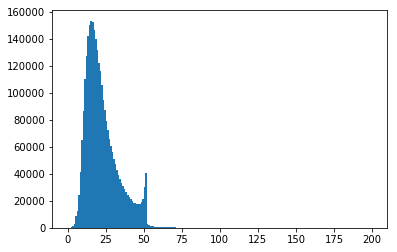

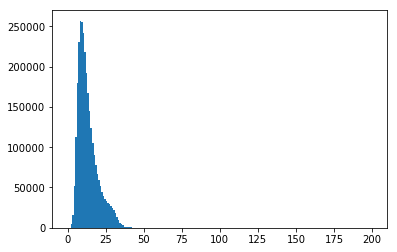

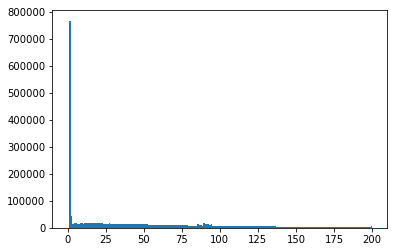

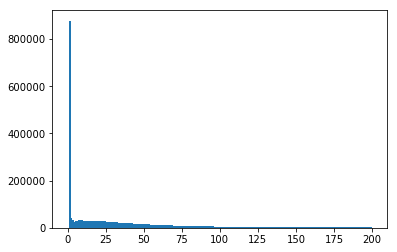

In [44]:
# 问题的长度统计
import numpy as np
char_title_lengths = np.array([len(question[1].split(',')) for question in question_train])
word_title_lengths = np.array([len(question[2].split(',')) for question in question_train])
char_descp_lengths = np.array([len(question[3].split(',')) for question in question_train])
word_descp_lengths = np.array([len(question[4].split(',')) for question in question_train])

print len(char_title_lengths), char_title_lengths[0:10]
print len(word_title_lengths), word_title_lengths[0:10]
print len(char_descp_lengths), char_descp_lengths[0:10]
print len(word_descp_lengths), word_descp_lengths[0:10]

from matplotlib import pyplot as plt
plt.hist(char_title_lengths, 200, [0, 200]);
plt.show()
plt.hist(word_title_lengths, 200, [0, 200]);
plt.show()
plt.hist(char_descp_lengths, 200, [0, 200]);
plt.show()
plt.hist(word_descp_lengths, 200, [0, 200]);
plt.show()

## question_topic_train_set

话题和其对应的标签

1. 话题 id
2. 对应的所有标签 ids

In [2]:
question_train_topic = map(lambda s: s.strip('\n').split('\t'), open('question_topic_train_set.txt').readlines())
print len(question_train_topic), '\n'
print '\n'.join(question_train_topic[2])

2999967 

-2687466858632038806
-760432988437306018


1999 2593


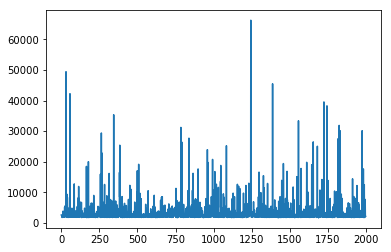

In [7]:
# 话题出现的次数
topic_dict = dict((topic[0], 0) for topic in topics)
for topic in question_train_topic:
    for t_id in topic[1].split(','):
        topic_dict[t_id] += 1
nums = [v for k, v in topic_dict.iteritems()]
print len(nums), nums[0]

from matplotlib import pyplot as plt
plt.plot(range(1999), nums)
plt.show()

## question eval

和 question train 格式一样，问题 id + 问题（字/词） + 描述（字/词）

In [3]:
question_eval = map(lambda s: s.strip('\n').split('\t'), open('question_eval_set.txt').readlines())
print len(question_eval), '\n'
print '\n'.join(question_eval[0])

217360 

6215603645409872328
c924,c531,c102,c284,c188,c104,c98,c107,c11,c117,c118,c91,c92,c960,c3225,c518,c419,c184,c622,c518,c419,c665,c936,c572,c1321,c11,c275,c2125,c184
w1340,w1341,w55,w1344,w58,w6,w24178,w26959,w471,w111,w642,w471,w3228,w20104,w19234,w6,w18505,w111
c1128,c529,c636,c572,c1321,c139,c540,c223,c510,c24,c473,c153,c131,c17,c322,c674,c40,c924,c531,c2,c398,c835,c57,c652,c101,c96,c97,c97,c98,c99,c100,c101,c373,c275,c1818,c2637,c38
w4094,w1618,w20104,w19234,w1097,w1005,w4228,w2160,w72,w11,w215,w1067,w1340,w1341,w848,w1009,w686,w54,w53,w54,w139426,w23


217360 [29 24 34 23 18 32 29 39 15 19]
217360 [18 15 16 12 10 16 18 25 10 12]
217360 [37  1 65 21  1  1 52  1 34 38]
217360 [22  1  1 13  1  1 28  1 23 19]


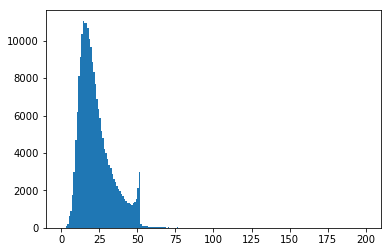

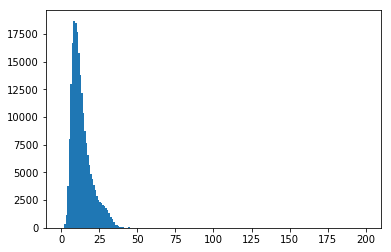

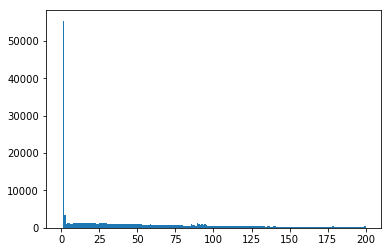

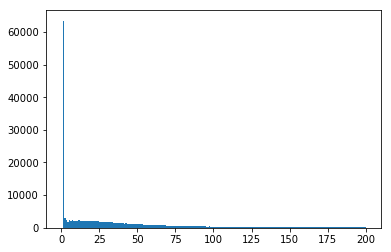

In [43]:
char_title_lengths = np.array([len(question[1].split(',')) for question in question_eval])
word_title_lengths = np.array([len(question[2].split(',')) for question in question_eval])
char_descp_lengths = np.array([len(question[3].split(',')) for question in question_eval])
word_descp_lengths = np.array([len(question[4].split(',')) for question in question_eval])

print len(char_title_lengths), char_title_lengths[0:10]
print len(word_title_lengths), word_title_lengths[0:10]
print len(char_descp_lengths), char_descp_lengths[0:10]
print len(word_descp_lengths), word_descp_lengths[0:10]

plt.hist(char_title_lengths, 200, [0, 200]);
plt.show()
plt.hist(word_title_lengths, 200, [0, 200]);
plt.show()
plt.hist(char_descp_lengths, 200, [0, 200]);
plt.show()
plt.hist(word_descp_lengths, 200, [0, 200]);
plt.show()

In [6]:
ids = set([int(question[0]) for question in question_train_topic])

In [11]:
for question in question_eval:
    if int(question[0]) in ids:
        print 'wa'    